<a href="https://colab.research.google.com/github/aoko13/ST207-CW2/blob/main/ST207_CW2_49466.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-world Description

I am on a sport committee at LSE. We have many different members, for whom we store their unique LSE ID number, their first and last name, the date they joined, and their ability level (which can be beginner, intermediate, or advanced, defined by certain skills that we test if they can do). This ability level then defines which class types they are allowed to attend. Specifically, any ability level can attend choreography & spin, but otherwise students can only attend classes of their ability level or lower (i.e beginners cannot attend intermediate or advanced, but advanced could attend intermediate and beginner if they wanted).
Members attend classes, each of which has a unique class ID, class type (eg beginner, intermediate, advanced, choreography and spin) and the unique teacher ID of the one teacher who will instruct the class.
For each teacher, we store their ID, their name, the class type they specialise in and how much they charge per class/hour. We must have that the speciality of the teacher matches the type of class that they are teaching.
Members can buy passes for classes through the LSE website, and we will store each of these transactions also. Each purchase will have the transaction ID, the member ID who bought, the price and the date of the transaction. 
We also have a few competitions coming up. Each competition will have a unique competition ID, name, and then the IDs for each of the competitors under each category. There are beginner, intermediate and advanced competition categories, and we need at least 1 competitor in one of these categories in order to compete (but we do not need all). Each competitor must be competing in the 
 equivalent to their ability level, otherwise they can be disqualified.

E-R diagram for clarity:

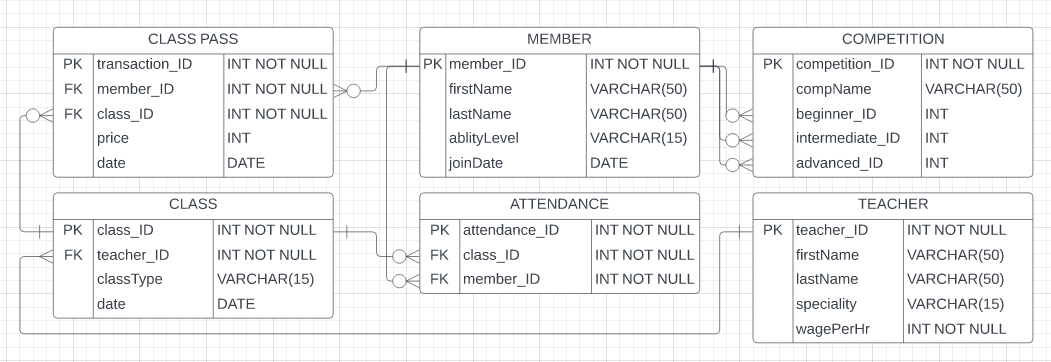

# Creating & Populating Tables

First let's set up the connection to the database and check it is working by printing all the changes (which should return 0 as we have made no changes so far).

In [ ]:
import sqlite3
import pandas as pd
from pandas import DataFrame

conn = sqlite3.connect('PoleDatabase') 
cursor = conn.cursor()
print(conn.total_changes)

import sys
print(sys.version)


0
3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]


Next let's populate the table using DDL commands.

In [ ]:

# --- CREATING MEMBER TABLE ---
cursor.execute("""  CREATE TABLE IF NOT EXISTS member (
                    member_ID integer PRIMARY KEY,
                    firstName text,
                    lastName text,
                    abilityLevel text NOT NULL,
                    joinDate text) """)
memberList = [(202007127, "Joe", "King", "Beginner", "2022/09/05"),
           (202028489, "Mary", "Adams", "Beginner", "2022/09/10"),
           (202082348, "Elizabeth", "Hamilton", "Beginner", "2022/10/18"),
           (202184849,"Elliot", "Armstrong", "Beginner", "2022/09/13"),
           (202284848,"Ruby", "Richards", "Intermediate", "2021/09/09"),
           (202083898,"Charlotte", "Williams", "Intermediate", "2021/09/28"),
           (202118940,"Ben", "Waters", "Intermediate", "2021/10/20"),
           (202011840,"Jordan","Doyle","Advanced", "2020/09/01"),
           (202018248,"Francesca", "Chambers","Advanced", "2020/09/01")]
cursor.execute("DELETE FROM member")
cursor.executemany('INSERT INTO member (member_ID, firstName, lastName, abilityLevel, joinDate) VALUES(?,?,?,?,?);',memberList);

# --- TEACHER TABLE ---
cursor.execute(""" DROP TABLE IF EXISTS teacher""")
cursor.execute("""  CREATE TABLE IF NOT EXISTS teacher (
                    teacher_ID integer PRIMARY KEY AUTOINCREMENT,
                    firstName text,
                    lastName text,
                    speciality text NOT NULL,
                    wagePerHour integer NOT NULL)  """)

teacherList = [("Kate","Brown", "Beginner",50),
           ("Farisha","Callum","Intermediate",60),
           ("Alex", "Grimshaw", "Advanced", 65),
           ("Mel", "C", "Choreography", 50),
           ("Ethan","Smith","Spin", 55)]
cursor.execute("DELETE FROM teacher")
cursor.executemany('INSERT INTO teacher (firstName, lastName, speciality,wagePerHour) VALUES(?,?,?,?);',teacherList);

# --- CLASS TABLE ---
cursor.execute(" DROP TABLE IF EXISTS class")
cursor.execute("""  CREATE TABLE IF NOT EXISTS class (
                    class_ID integer PRIMARY KEY AUTOINCREMENT,
                    teacher_ID integer NOT NULL,
                    classType text,
                    date text,
                    FOREIGN KEY(teacher_ID) REFERENCES teacher(teacher_ID)) """)
classList = [(1, "Beginner", "2022/11/30"),
           (2, "Intermediate", "2022/11/30"),
           (3, "Advanced", "2022/11/30"),
           (4, "Choreography","2022/12/02"),
           (5, "Spin", "2022/12/02"),
           (1, "Beginner", "2022/12/07"),
           (1, "Beginner", "2022/12/07")]
cursor.execute("DELETE FROM class")
cursor.executemany('INSERT INTO class (teacher_ID, classType, date) VALUES(?,?,?);',classList);

# --- CLASSPASS TABLE ---
cursor.execute("""  CREATE TABLE IF NOT EXISTS classpass (
                    transaction_ID integer PRIMARY KEY AUTOINCREMENT,
                    member_ID integer NOT NULL,
                    class_ID integer NOT NULL,
                    price float,
                    date text,
                    FOREIGN KEY(member_ID) REFERENCES member(member_ID),
                    FOREIGN KEY(class_ID) REFERENCES class(class_ID))""")
classPassList = [(202028489, 1, 3.50, "2022/11/21"),
           (202082348, 1, 3.50,"2022/11/28"),
           (202007127, 1, 3.50,"2022/11/29"),
           (202184849, 1, 3.50,"2022/11/28"),
           (202284848, 2, 4, "2022/12/02"), 
           (202083898, 2, 4, "2022/12/02"),
           (202018248, 2, 4, "2022/12/02"),
           (202011840, 3, 4.50, "2022/12/02"),
           (202007128, 3, 4.50,"2022/11/20"),
           (202018248, 3, 4.50, "2022/11/21"),
           (202028489, 4, 3.50, "2022/11/21"), 
           (202082348, 4, 3.50, "2022/11/21"),
           (202284848, 4, 3.50, "2022/11/21"),
           (202007128, 5, 3.50, "2022/11/21"), 
           (202083898, 5, 3.50, "2022/11/21"),
           (202082348, 6, 3.50, "2022/12/05"),
           (202007127, 6, 3.50,"2022/11/29"),
           (202184849, 6, 3.50,"2022/11/28")
           ]
cursor.execute("DELETE FROM classpass")
cursor.executemany('INSERT INTO classpass (member_ID, class_ID, price, date) VALUES(?,?,?,?);',classPassList);

# --- ATTENDANCE TABLE --- 
cursor.execute("""DROP TABLE IF EXISTS attendance""")
cursor.execute("""  CREATE TABLE IF NOT EXISTS attendance (
                    attendance_ID integer PRIMARY KEY AUTOINCREMENT,
                    member_ID integer NOT NULL,
                    class_ID integer NOT NULL,
                    FOREIGN KEY(member_ID) REFERENCES member(member_ID),
                    FOREIGN KEY (class_ID) REFERENCES class(class_ID) )""")
attendanceList = [(202028489, 1),
           (202082348, 1),
           (202007127, 1),
           (202184849, 1),
           (202284848, 2),
           (202083898, 2),
           (202018248, 2),
           (202011840, 3),
           (202007128, 3),
           (202018248, 3),
           (202028489, 4), 
           (202082348, 4),
           (202284848, 4),
           (202007128, 5),
           (202083898, 5),
           (202082348, 6),
           (202184849, 6)]
cursor.execute("DELETE FROM attendance")
cursor.executemany("INSERT INTO attendance (member_ID, class_ID) VALUES(?,?);",attendanceList);


# --- COMPETITION TABLE --- 
cursor.execute("""DROP TABLE IF EXISTS competition""")
cursor.execute("""  CREATE TABLE IF NOT EXISTS competition (
                    competition_ID integer PRIMARY KEY,
                    name text,
                    beginner_ID integer,
                    intermediate_ID integer,
                    advanced_ID integer
                    CONSTRAINT at_least_1_competitor check (beginner_ID IS NOT NULL OR intermediate_ID IS NOT NULL OR advanced_ID IS NOT NULL))""")
competitionList = [("London Varsity", 202028489, 202083898, 202011840),
           ("Imperial Varsity", 202007127, 202284848, 202007128),
           ("IUPDC", 202028489, 202083898, 202007128)]
cursor.execute("DELETE FROM competition")
cursor.executemany('INSERT INTO competition (name, beginner_ID, intermediate_ID, advanced_ID) VALUES(?,?,?,?);',competitionList);

conn.commit()

# Views


A useful view to create would be a table of all competitors and their information. This is necessary because currently we can only see ID numbers assigned to each competition's categories in the competition entity, which doesn't help us to identify competitors when looking. For example, if we wanted to organise competition training for all competitors, it would be much more useful to have a list of all members and names so we can contact them to find availability, instead of having to refer back to the member table manually and see who aligns to which ID number. We can keep this view permanently for this reason, as competition training continues all throughout the year. This view will use the attributes member_ID as a unique identifer, first name, last name, and their competition category. 

As mentioned before, the competitor's ability level must match the category they are entering in the competition, as otherwise they would be disqualified (as they don't want, eg, advanced students competing in beginner categories, making the competition unfair). We will later add this as a trigger check when adding competitors (for reference, trigger check_Competitor_Category_Eligibility). For this reason, we will rename the abilityLevel column to category for this view.




In [ ]:
cursor.execute("""DROP VIEW IF EXISTS competitor """)
cursor.execute("""CREATE VIEW competitor AS
                        SELECT DISTINCT member.member_ID, member.firstName, member.lastName, member.abilityLevel "Category" FROM member, competition
                        WHERE member.member_ID = competition.beginner_ID OR
                               member.member_ID = competition.intermediate_ID OR
                               member.member_ID = competition.advanced_ID 
                        ORDER BY CASE
                        WHEN Category = "Beginner" THEN 1
                        WHEN Category = "Intermediate" THEN 2
                        WHEN Category = "Advanced" THEN 3
                        END ASC""") # Custom sort so that it can be in beginner, intermediate, advanced order
conn.commit()

display(pd.read_sql("SELECT * FROM competitor", conn))


,member_ID,firstName,lastName,Category
0,202028489,Mary,Adams,Beginner
1,202007127,Joe,King,Beginner
2,202083898,Charlotte,Williams,Intermediate
3,202284848,Ruby,Richards,Intermediate
4,202011840,Jordan,Doyle,Advanced


Another useful view for our mini-world would be to create a 'register' of attendance numbers for each class. We like to be aware of attendance numbers fora ll of our different classes because throughout the year attendance changes amongst the class types. As people improve and progress, there is less interest in beginner classes and more people sign up for intermediate, and in response to this we can change the number of each type of class per week. So we can create a view to see the number of people that have attended each class.
We will order this by date (most recent to least) so we can see, in particular, how these numbers change over time, which is what we want to know when deciding which classes to add more of or remove.

In [ ]:
cursor.execute("""DROP VIEW IF EXISTS totalAttendancePerClass """)
cursor.execute("""CREATE VIEW IF NOT EXISTS totalAttendancePerClass AS
                        SELECT attendance.class_ID, class.classType, class.date, count(attendance.member_ID) as "Attendance" FROM attendance, class
                            WHERE class.class_ID = attendance.class_ID
                            GROUP BY class.class_ID
                            ORDER BY CAST(REPLACE(class.date,"/","") AS INT) DESC """ ) #SQLite does not have a date data type, so we are concatenating our YYYY/mm/dd dates into a YYYYmmdd integer for comparison purposes


display(pd.read_sql(""" SELECT * FROM totalAttendancePerClass """, conn))

,class_ID,classType,date,Attendance
0,6,Beginner,2022/12/07,2
1,4,Choreography,2022/12/02,3
2,5,Spin,2022/12/02,2
3,1,Beginner,2022/11/30,4
4,2,Intermediate,2022/11/30,3
5,3,Advanced,2022/11/30,3


As an example (in this small context), we can see that our beginner classes had half the amount of attendees as the week before. This could be an indication that our members have improved and we could reduce the number of beginner classes we offer.

# Triggers

One of the first constraints mentioned was the constraint on what class types certain ability levels can attend. Any ability level can attend choreography and spin classes, but otherwise members can only attend classes of their ability level or lower. This puts a constraint on inserting into the classpass table, as we shouldn't allow members to buy a pass for a class they aren't eligible for.
We will later add a constraint that disallows any member from attending a class (aka a trigger when inserting into attendance) that hasn't paid, which will ensure no ineligible member is signed up for a class on classpass or attending it through attendance.

We need a method to compare ability levels. Logically, ability levels are in a hierachy, so beginner is less able than intermediate, which is less able than advanced. So a member should only be able to attend a class which is less than or equal to " <= " their ability level. Therefore, we can use a CASE WHEN statement to assign each ability and class type an integer for comparison purposes, eg beginner has value 1, intermediate 2 and advanced 3. This way we can directly say beginner < intermediate < advanced. We will also add an 'else' statement on the classType CASE statement to catch the choreography and spin classes. We assign these classes to 0, so that it is impossible to have an ability level lower than the value of these classes, because these classes are open to any ability. We can implement this trigger as follows:

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS check_Class_Eligibility """)

cursor.execute(""" CREATE TRIGGER check_Class_Eligibility BEFORE INSERT ON classpass
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT CASE WHEN
                            ((CASE member.abilityLevel
                                WHEN 'Beginner' THEN 1
                                WHEN 'Intermediate' THEN 2
                                WHEN 'Advanced' THEN 3
                            END) <
                            (CASE class.classType
                              WHEN 'Beginner' THEN 1
                              WHEN 'Intermediate' THEN 2
                              WHEN 'Advanced' THEN 3
                              ELSE 0
                            END)) THEN 'TRUE'
                          END
                          FROM classpass
                          INNER JOIN member ON member.member_ID = NEW.member_ID
                          INNER JOIN class ON class.class_ID = NEW.class_ID) 
                        IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: Member cannot sign up for this class as it is higher than their ability level.")
                   END;
                  END; """)

# Test query that tries to sign a beginner up for an intermediate class
#cursor.execute(""" INSERT INTO classpass (member_ID, class_ID, price, date) VALUES (202007127, 2, 3.50, "01/01/22") """)

The test insert worked as expected by throwing the correct error message. This is commented out (as are all other trigger tests) for display purposes and so that when running the notebook errors aren't thrown, but this can be uncommented to test it is working correctly.



The next important trigger would be to ensure that the competitors are eligible for the category that they enter. Competitions are very strict about competitors entering the correct category at their ability level, and have disqualified people before for this reason. To do this, we must check that the each competitor's category matches their ability level.

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS check_Competitor_Category_Eligibility """)

cursor.execute(""" CREATE TRIGGER check_Competitor_Category_Eligibility BEFORE INSERT ON competition
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT NEW.competition_ID FROM competition,member
                            WHERE NEW.beginner_ID = member.member_ID AND abilityLevel != "Beginner"
                            OR NEW.intermediate_ID = member.member_ID AND abilityLevel != "Intermediate"
                            OR NEW.advanced_ID = member.member_ID AND abilityLevel != "Advanced") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: Competitor cannot enter a category outside of their ability level.")
                   END;
                  END; """)


#Testing the trigger executes correctly, we expect it to raise the issue with our custom message
#cursor.execute(""" INSERT INTO competition (name, beginner_ID, intermediate_ID, advanced_ID) VALUES ("Example Competition", 202083898,202011840, 202028489) """) #Competitors in incorrect categories

It successfully raises the error, so we know this trigger works correctly.

The most common 'update' that would be carried out on this database is likely updating a member's ability level, as this is an attribute which will regularly change.
When changing an ability level, one of the concerns would be if the member is already a competitor. If a beginner competitor progresses enough while training to become intermediate, they cannot compete as a beginner anymore. So, we can add a trigger so that before we update the ability level of a member, it checks if they are a competitor and reminds the user that they must change the member's competition category (change or remove them from the competition) first.

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS check_Competitor_Eligibility_After_Ability_Change """)

cursor.execute(""" CREATE TRIGGER check_Competitor_Eligibility_After_Ability_Change BEFORE UPDATE OF abilityLevel ON member
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT member.member_ID FROM member
                          INNER JOIN competitor ON competitor.member_ID = member.member_ID
                           WHERE NEW.abilityLevel != competitor.category )
                    IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: This member is a competitor. You must remove them as a competitor from their old category before updating their ability.")
                   END;
                  END; """)

#Test update trying to set a beginner competitor's new ability to advanced
# cursor.execute("""UPDATE member
#                   SET abilityLevel = "Advanced"
#                   WHERE member.member_ID = 202007127""")

The test update throws the correct error.

We next need a trigger to ensure that teachers are only teaching classes that match their speciality. We have teachers who we hire for each ability level, as well as specialists for our choreography and spin classes. We need to ensure when adding a new class that the teacher assigned to the class can teach it.

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS check_Teacher_Speciality """)

cursor.execute(""" CREATE TRIGGER check_Teacher_Speciality BEFORE INSERT ON class
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT NEW.class_ID FROM class, teacher
                            WHERE NEW.teacher_ID = teacher.teacher_ID and NEW.classType != teacher.speciality) IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: This teacher cannot teach this class. Class type and teacher speciality does not match.")
                   END;
                  END; """)

 #Testing the trigger executes correctly, we expect it to raise an error with our custom message
#cursor.execute(""" INSERT INTO class (teacher_ID, classType, date) VALUES (5, "Choreography","02/12/2022") """)

This trigger has raised the issue correctly.

The next trigger we can add is a very useful one to the everyday running of the society; we can add a trigger to ensure that students have paid for the class they want to attend. Before we can add a new entry to the 'attendance' table, we can check that the student has bought the appropriate class pass for the class & date they want to attend. 

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS check_Student_Paid """)

cursor.execute(""" CREATE TRIGGER check_Student_Paid BEFORE INSERT ON attendance
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT classpass.class_ID FROM classpass, attendance
                            WHERE classpass.member_ID = NEW.member_ID AND classpass.class_ID = NEW.class_ID) IS NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: Student has not paid for this class, so can't attend.")
                   END;
                  END; """)

 #Testing the trigger executes correctly, we expect it to raise the issue with our custom message
#cursor.execute(""" INSERT INTO attendance (member_ID, class_ID) VALUES (1,5) """) #Trying to insert a new choreography class with our spin teacher

The next trigger would be to ensure that no-one has bought a pass for a class when trying to delete a class. If we were to cancel a class and wanted to delete it from the database, this trigger would ensure that no-one has already bought/paid for this class. If this is the case, we should not be cancelling the class, so this trigger ensures we don't.

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS classDeleteWithSignUps """)

cursor.execute(""" CREATE TRIGGER classDeleteWithSignUps BEFORE DELETE ON class
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT classpass.class_ID FROM classpass
                            WHERE OLD.class_ID = classpass.class_ID) IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: This class already has members who have signed up and paid. This can't be deleted.")
                   END;
                  END; """)

#Test deletion, trying to delete beginner class 1 which we know already has signups, to see if trigger works correctly:
#cursor.execute(""" DELETE FROM class WHERE class_ID = 1""")

This does throw the error as expected.

The last triggers we will add are basic triggers to ensure entities have the correct values. We will ensure that abilityLevel only holds the values "Beginner" or "Intermediate" or "Advanced", and classType only holds "Beginner" or "Intermediate" or "Advanced" or "Choreography" or "Spin", etc

In [ ]:
cursor.execute(""" DROP TRIGGER IF EXISTS checkAbilityLevel """)
cursor.execute(""" CREATE TRIGGER checkAbilityLevel BEFORE INSERT ON member
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT member.member_ID FROM member
                            WHERE NEW.abilityLevel != "Beginner" AND NEW.abilityLevel != "Intermediate" AND NEW.abilityLevel != "Advanced") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: The ability level is invalid. Must be beginner, intermediate or advanced.")
                   END;
                  END; """)

#Testing the trigger:
#cursor.execute(""" INSERT INTO member (member_ID, firstName, lastName, abilityLevel, joinDate) VALUES (202000000, "Joe", "Bloggs", "Other", "01/01/2020") """)

cursor.execute(""" DROP TRIGGER IF EXISTS checkClassType """)
cursor.execute(""" CREATE TRIGGER checkClassType BEFORE INSERT ON class
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT class.class_ID FROM class
                            WHERE NEW.classType != "Beginner" AND NEW.classType != "Intermediate" AND NEW.classType != "Advanced" AND NEW.classType != "Choreography" AND NEW.classType != "Spin") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: The class type is invalid. Must be beginner, intermediate, advanced, choreography or spin.")
                   END;
                  END; """)

#Testing the trigger:
#cursor.execute(""" INSERT INTO class (teacher_ID, classType, date) VALUES (1, "Other", "01/01/2020") """)


cursor.execute(""" DROP TRIGGER IF EXISTS checkDateInClassPass """)
cursor.execute(""" CREATE TRIGGER checkDateInClassPass BEFORE INSERT ON classpass
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT classpass.date FROM classpass
                            WHERE NEW.date NOT LIKE "____/__/__") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: The date format is invalid. Must be YYYY/mm/dd.")
                   END;
                  END; """)

#Testing the trigger:
#cursor.execute("""INSERT INTO classpass (member_ID, class_ID, price, date) VALUES (202007128, 1, 3.50, "20/30/30") """)


cursor.execute(""" DROP TRIGGER IF EXISTS checkDateInClass """)
cursor.execute(""" CREATE TRIGGER checkDateInClass BEFORE INSERT ON class
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT class.date FROM class
                            WHERE NEW.date NOT LIKE "____/__/__") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: The date format is invalid. Must be YYYY/mm/dd.")
                   END;
                  END; """)

#Testing the trigger:
#cursor.execute("""INSERT INTO class (teacher_ID, classType, date) VALUES (1, "Intermediate", "Halloween") """)

cursor.execute(""" DROP TRIGGER IF EXISTS checkDateInMember """)
cursor.execute(""" CREATE TRIGGER checkDateInMember BEFORE INSERT ON member
                   BEGIN
                    SELECT CASE
                    WHEN ((SELECT member.joinDate FROM member
                            WHERE NEW.joinDate NOT LIKE "____/__/__") IS NOT NULL)
                    THEN RAISE(FAIL, "TRIGGER ISSUE: The date format is invalid. Must be YYYY/mm/dd.")
                   END;
                  END; """)

#Testing the trigger:
#cursor.execute("""INSERT INTO member (firstName, lastName, abilityLevel, joinDate) VALUES ("Joe", "Bloggs", "Beginner",1) """)


All the commented out test inserts work correctly.

# SQL Queries

We want to create a simple UI for users to be able to get results to common SQL queries. If we were to actually implement this for use I would use a library to create a GUI (perhaps tkinter, but would more likely create a web interface for ease of access), and use the functions to get the results, but for now a simple command line will work. To be able to do this, lets first define some reuseable functions that will return the data we want, and then set up the interface later.

A common piece of information we would like to see is a personal register of attendance for each member. We would like to be able to see all classes that one member has attended. 

In [ ]:
def memberAttendance(memberIDRequested):
  return pd.read_sql(""" SELECT attendance.class_ID, class.classType, class.date FROM attendance
                            INNER JOIN class on class.class_ID = attendance.class_ID
                            WHERE attendance.member_ID = """+str(memberIDRequested),conn)

We can test whether this function returns the correct information by using a test ID.

In [ ]:
display(memberAttendance(202007128))

,class_ID,classType,date
0,3,Advanced,2022/11/30
1,5,Spin,2022/12/02


It works as expected.

A similar piece of information we might need is a count of how many of each class type a member has attended. We often gets students asking us if/when they can move up an ability level, and besides the tricks we test them on, we require them to have attended a few classes in their current ability level before being able to level up. So, when asked this question, we could use this function to enter their ID and check to see how many of each class they have attended. Eg, if there is an intermediate member who wants to level up to advanced, we can see how many beginner and how many intermediate classes they have and then gauge if they have enough experience to progress.

In [ ]:
def totalAttendanceByCategory(memberIDRequested):
  return pd.read_sql(""" SELECT attendance.class_ID, class.classType, count(attendance.class_ID) as "Total Attended" FROM attendance
                            INNER JOIN class on class.class_ID = attendance.class_ID
                            WHERE attendance.member_ID = """ + str(memberIDRequested) + """
                            GROUP BY class.classType""", conn)
  
  #Testing the function:
display(totalAttendanceByCategory(202028489))

,class_ID,classType,Total Attended
0,1,Beginner,1
1,4,Choreography,1


The next attendance related query will be splitting up class attendance based on ability level. It would be useful to see the general ability split of all classes, especially for the choreography and spin classes. This is particularly useful information for our teachers, as these 'all ability welcome' classes (eg choreo and spin) end up having more beginners or more advanced, they can tailor the lesson to this ability split.

In [ ]:
def attendanceByAbility():
  return pd.read_sql(""" SELECT class.class_ID, class.classType,
                                count(CASE WHEN member.abilityLevel = "Beginner" THEN 1 ELSE NULL END) as beginnerCount,
                                count(CASE WHEN member.abilityLevel = "Intermediate" THEN 1 ELSE NULL END) as intermediateCount,
                                count(CASE WHEN member.abilityLevel = "Advanced" THEN 1 ELSE NULL END) as advancedCount 
                        FROM class 
                        JOIN attendance ON attendance.class_ID = class.class_ID
                        JOIN member ON member.member_ID = attendance.member_ID
                        GROUP BY class.class_ID""", conn)
  
  #Testing the function:
display(attendanceByAbility())

,class_ID,classType,beginnerCount,intermediateCount,advancedCount
0,1,Beginner,4,0,0
1,2,Intermediate,0,2,1
2,3,Advanced,0,0,2
3,4,Choreography,2,1,0
4,5,Spin,0,1,0
5,6,Beginner,2,0,0


Another very useful query could be calculating how much we owe the teachers. They send us invoices for their services, and we can cross check this with our database. By inputting 2 dates, we can check all classes that have run between those two dates and see how much we owe them. Eg, we can enter the date we last paid them as 'dateFrom' and then the current Date, so find out how much we currently owe them. We can also see the history of invoices very easily using this reusable function.
We will do validation at the input step, so we can assume here that the passed in variables are in the correct format.

In [ ]:
def teacherInvoice(dateFrom,dateTo): # in form YYYY-MM-DD
    dateFrom = dateFrom.replace("/","")
    dateTo = dateTo.replace("/","")
    return pd.read_sql(""" SELECT class.teacher_ID, teacher.firstName, teacher.lastName, count(wagePerHour) as classesTaught, sum(wagePerHour) as totalOwed FROM class
                          INNER JOIN teacher ON teacher.teacher_ID = class.teacher_ID
                          WHERE (CAST(REPLACE(class.date,"/","") AS INT) <= """ + str(dateTo) + """) AND 
                                 (CAST(REPLACE(class.date,"/","") AS INT) >= """ + str(dateFrom) + """ )
                          GROUP BY teacher.teacher_ID""", conn)
    
    #Testing the function:  
print(teacherInvoice("2020/01/01", "2022/12/01"))


   teacher_ID firstName  lastName  classesTaught  totalOwed
0           1      Kate     Brown              1         50
1           2   Farisha    Callum              1         60
2           3      Alex  Grimshaw              1         65


We also need information about how much money we are generating. One simple way we would do this is by showing the total revenue each class we have put on has made.

In [ ]:
def revenueByClass():
  return pd.read_sql(""" SELECT class.class_ID, class.classType, class.date, sum(classpass.price) as totalRevenue FROM classpass
                            LEFT JOIN class on class.class_ID = classpass.class_ID
                            GROUP BY class.class_ID
                            ORDER BY totalRevenue """, conn)
  
  #Testing the function:
display(revenueByClass())

,class_ID,classType,date,totalRevenue
0,5,Spin,2022/12/02,7.0
1,4,Choreography,2022/12/02,10.5
2,6,Beginner,2022/12/07,10.5
3,2,Intermediate,2022/11/30,12.0
4,3,Advanced,2022/11/30,13.5
5,1,Beginner,2022/11/30,14.0


We can also calculate our 'profit' by class, which will be deducting the wage we pay our teachers. These profits are all negative as we are funded by the SU to cover this gap (and also as the members in this database is a subset of the number of members we actually have).

In [ ]:
def profitByClass():
  return pd.read_sql(""" SELECT class.class_ID, class.classType, class.date, (sum(classpass.price) - wagePerHour) as totalProfit FROM classpass
                            LEFT JOIN class ON class.class_ID = classpass.class_ID
                            LEFT JOIN teacher ON teacher.teacher_ID = class.teacher_ID
                            GROUP BY class.class_ID
                            ORDER BY totalProfit DESC """, conn)
  
  #Testing the function:
display(profitByClass())

,class_ID,classType,date,totalProfit
0,1,Beginner,2022/11/30,-36.0
1,4,Choreography,2022/12/02,-39.5
2,6,Beginner,2022/12/07,-39.5
3,2,Intermediate,2022/11/30,-48.0
4,5,Spin,2022/12/02,-48.0
5,3,Advanced,2022/11/30,-51.5


Another useful statistic would be the average revenue by class category. We need to know if our classes are generally profitable (as class attendance is subject to fluctuations due to other AU activities, eg Carol, so an average is helpful) and make a decision on which classes to keep.

In [ ]:
def averageRevenueByCategory():
  return pd.read_sql(""" SELECT class.classType, class.date, sum(classpass.price)/count(DISTINCT class.class_ID) as averageRevenue FROM class
                        INNER JOIN classpass on classpass.class_ID = class.class_ID
                            GROUP BY class.classType
                            ORDER BY averageRevenue DESC""", conn)
  
  #Testing the function:
display(averageRevenueByCategory())

,classType,date,averageRevenue
0,Advanced,2022/11/30,13.50
1,Beginner,2022/12/07,12.25
2,Intermediate,2022/11/30,12.00
3,Choreography,2022/12/02,10.50
4,Spin,2022/12/02,7.00


For completeness, we can make the similar query of average profit by category:

In [ ]:
def averageProfitByCategory():
  return pd.read_sql(""" SELECT class.class_ID, class.classType, class.date, (sum(classpass.price) / count(DISTINCT class.class_ID)) - teacher.wagePerHour as averageProfit FROM classpass
                            LEFT JOIN class ON class.class_ID = classpass.class_ID
                            LEFT JOIN teacher ON teacher.teacher_ID = class.teacher_ID
                            GROUP BY class.classType
                            ORDER BY averageProfit DESC """, conn)
  
#Testing the function:
display(averageProfitByCategory())


,class_ID,classType,date,averageProfit
0,6,Beginner,2022/12/07,-37.75
1,4,Choreography,2022/12/02,-39.50
2,2,Intermediate,2022/11/30,-48.00
3,5,Spin,2022/12/02,-48.00
4,3,Advanced,2022/11/30,-51.50


We can now set up the very basic input interface for our users to interact with. If this database was to be fully implemented, this interface could easily be changed to use other libraries specifically for GUIs as we have the functions at our disposal.

In [ ]:

reportChoice = input(""" Please make a selection:
                1) Financial Reports
                2) Attendance Reports 
                Enter selection (1 or 2): """)
# Google Colab uses Python 3.8, so match-case can't be used
if reportChoice == "1":       
  finReportChoice = input(""" Please make a selection:
                  1) Revenue & Profits
                  2) Teacher Payments/Invoice
                  Enter selection (1 or 2): """)
  if finReportChoice == "1":
    display(revenueByClass())
    display(profitByClass())
    display(averageRevenueByCategory())
    display(averageProfitByCategory())
  elif finReportChoice == "2": #If teacher
    dateFrom = input("Please enter the date to start the selection from (YYYY/mm/dd): ")
    dateTo = input("Please enter the date to end the selection to: ")
    
    try:
      intDateFrom = int(dateFrom.replace("/",""))
      intDateTo = int(dateTo.replace("/","")) # Testing that input is correct

      if teacherInvoice(dateFrom, dateTo).empty:
        print("No results for given timeframe.")
      else:
        display(teacherInvoice(dateFrom, dateTo))
    except:
      print("Non-integer entry. Must be in the form YYYY/mm/dd.")
    
  else:
    print("Invalid selection.")
elif reportChoice == "2": # If Attendance
  attReportChoice = input(""" Please make a selection:
                  1) Individual Attendance by Member_ID
                  2) Total Attendance Split by Ability Level
                  Enter selection (1 or 2): """)
  if attReportChoice == "1":
    memberID = input("Please enter member ID: ")
    if memberAttendance(memberID).empty:
      print("No member found with that ID.")
    else:
      display(memberAttendance(memberID))
  elif attReportChoice == "2":
    display(attendanceByAbility())
  else:
    print("Invalid selection.")
else:
  print("Invalid selection.")

conn.commit()


 Please make a selection:
                1) Financial Reports
                2) Attendance Reports 
                Enter selection (1 or 2): 1
 Please make a selection:
                  1) Revenue & Profits
                  2) Teacher Payments/Invoice
                  Enter selection (1 or 2): 2
Please enter the date to start the selection from (YYYY/mm/dd): 2021/09/01
Please enter the date to end the selection to: 2022/31/21


,teacher_ID,firstName,lastName,classesTaught,totalOwed
0,1,Kate,Brown,3,150
1,2,Farisha,Callum,1,60
2,3,Alex,Grimshaw,1,65
3,4,Mel,C,1,50
4,5,Ethan,Smith,1,55
